In [1]:
# mount to drive
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/YELP/yelp_dataset/

PATH_OF_DATA='/content/drive/MyDrive/YELP/yelp_dataset/'

1_5  Dataset_User_Agreement.pdf		  yelp_academic_dataset_review.json
2_5  test_CziOtnFSklimJnBgksDDwA.json	  yelp_academic_dataset_tip.json
3_5  yelp_academic_dataset_business.json  yelp_academic_dataset_user.json
4_5  yelp_academic_dataset_checkin.json


In [3]:
from zmq.constants import NULL
from typing_extensions import dataclass_transform
import json

# Opening JSON file
json_root = PATH_OF_DATA + 'yelp_academic_dataset_business.json'
# f = open(json_root)

# business is a list of dic of business
business = []
with open(json_root, 'r') as file:
    for line in file:
        business.append(json.loads(line))

In [4]:
json_root = PATH_OF_DATA + 'yelp_academic_dataset_user.json'
# f = open(json_root)

# business is a list of dic of business
user = []
with open(json_root, 'r') as file:
    for line in file:
        user.append(json.loads(line))

In [5]:
print(len(business))
print(business[0]['stars'])
# star for recording stars of all business
star = []
for bus in business:
  star.append(bus['stars'])


150346
5.0


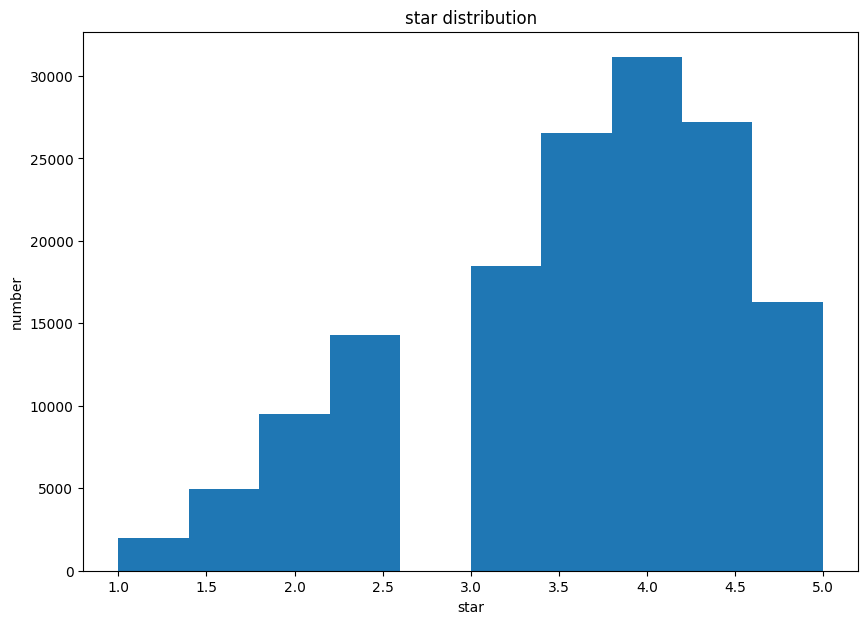

In [7]:
from matplotlib import pyplot as plt
import numpy as np

# Creating histogram
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(star)
plt.title('star distribution')
plt.ylabel('number')
plt.xlabel('star')

# Show plot
plt.show()


In [8]:
import random
business3_5 = []
# star_c = 3.5
for bus in business:
  if bus['stars'] == 1.5 and bus['review_count'] > 500:
    business3_5.append(bus)

print(len(business3_5))
# chosen_business = random.choice(business3_5)
# print(chosen_business)
chosen_business_id = 'CziOtnFSklimJnBgksDDwA' #3.5
# chosen_business_id = 'ytynqOUb3hjKeJfRj5Tshw' #4.5
# chosen_business_id = 'rSYyGcZZziJLsqKl5hMcDw' #2.5
# chosen_business_id = '1fy9fS3UH2k4TfQcryNKkA' #1.5

chosen_business = {}
for bus in business:
  if bus['business_id'] == chosen_business_id:
    chosen_business = bus.copy()
print(chosen_business)

1
{'business_id': 'CziOtnFSklimJnBgksDDwA', 'name': 'Pascucci', 'address': '509 State St', 'city': 'Santa Barbara', 'state': 'CA', 'postal_code': '93101', 'latitude': 34.419107, 'longitude': -119.699243, 'stars': 3.5, 'review_count': 1069, 'is_open': 1, 'attributes': {'OutdoorSeating': 'True', 'Caters': 'True', 'BusinessParking': "{'garage': True, 'street': True, 'validated': False, 'lot': False, 'valet': False}", 'RestaurantsPriceRange2': '2', 'Alcohol': "'full_bar'", 'WiFi': "u'free'", 'RestaurantsGoodForGroups': 'True', 'Corkage': 'True', 'BikeParking': 'True', 'GoodForKids': 'True', 'RestaurantsReservations': 'False', 'RestaurantsAttire': "'casual'", 'RestaurantsTakeOut': 'True', 'BusinessAcceptsCreditCards': 'True', 'NoiseLevel': "u'average'", 'GoodForMeal': "{'dessert': False, 'latenight': False, 'lunch': True, 'dinner': True, 'brunch': False, 'breakfast': False}", 'BYOBCorkage': "'yes_corkage'", 'HasTV': 'False', 'BusinessAcceptsBitcoin': 'False', 'HappyHour': 'True', 'Restauran

In [9]:
import os
directory = PATH_OF_DATA + "1_5"
if not os.path.exists(directory):
    os.makedirs(directory)

In [10]:
from ast import Return
json_root = PATH_OF_DATA + 'yelp_academic_dataset_review.json'
# f = open(json_root)

# business is a list of dic of business
review = []
tmp_dic = {}
with open(json_root, 'r') as file:
    for line in file:
      # print(line[88:110])
      # break
      if line[88:110] == chosen_business_id:
        review.append(json.loads(line))

print(len(review))

KeyboardInterrupt: ignored

In [ ]:
json_root = PATH_OF_DATA + 'yelp_academic_dataset_tip.json'
# f = open(json_root)

# business is a list of dic of business
tip = []
tmp_dic = {}
with open(json_root, 'r') as file:
    for line in file:
      json_line = json.loads(line)
      # print(line[51:73])
      # break
      if json_line['business_id'] == chosen_business_id:
        review.append(json_line)

print(len(tip))

In [ ]:
json_object = json.dumps(chosen_business)
out_path = directory + "/" + 'info.json'

with open(out_path, "w") as outfile:
    outfile.write(json_object)

In [ ]:
print(len(review))
# print(type(review[0]['text']))
json_object = json.dumps(review)
out_path = directory + "/review.json"

with open(out_path, "w") as outfile:
    outfile.write(json_object)


In [ ]:
print(review[0])